In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [9]:
df = pd.read_csv(r'automobile.csv')

In [10]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [11]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [24]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [25]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [26]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [27]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [31]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [32]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [41]:
print(df['drive-wheels'].unique())


['rwd' 'fwd' '4wd']


In [42]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [44]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [45]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [46]:
#fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h2>Variables: Drive Wheels and Body Style vs. Price</h2>

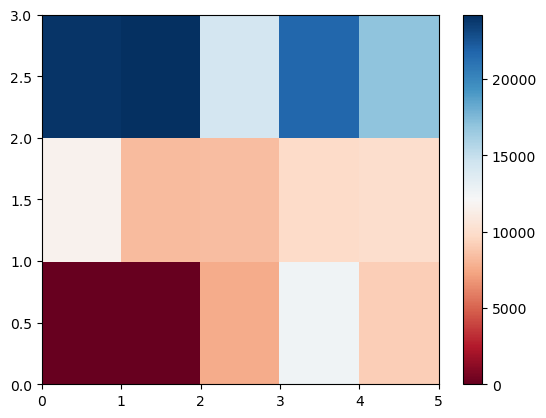

In [47]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>El gráfico heatmap traza la variable objetivo (price) proporcional al color con respecto a las variables "drive-wheel" y "body-style" en los ejes vertical y horizontal, respectivamente. Esto nos permite visualizar cómo se relaciona el precio con la "drive-wheel" y el "body-style".</p>

<h2>¿Cuáles son las principales características que tienen más impacto en el precio del coche?
</h2>

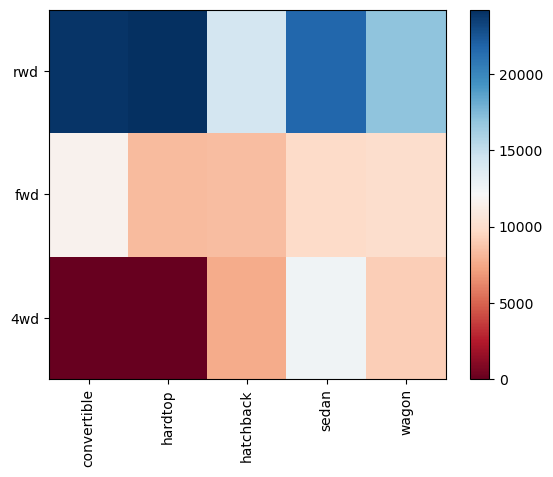

In [48]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>Podemos ver la correlación de estas variables con el precio del coche.</p>

<h2>We search the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</h2>


In [13]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Gráfico de dispersión de "tamaño del motor" y "precio".</h2>


(0.0, 53654.121859748404)

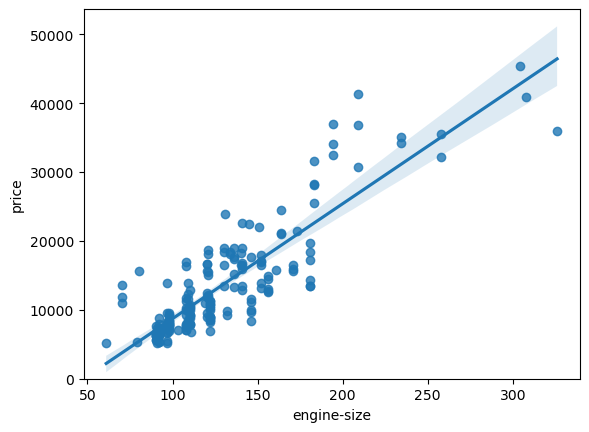

In [14]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un buen predictor del precio, ya que la línea de regresión es casi una línea diagonal perfecta. </p>

In [15]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<p>Podemos examinar la correlación entre "tamaño del motor" y "precio" y ver que es aproximadamente 0,87.</p>

<h2>Gráfico para predecir el consumo (mpg) relación el precio "highway-mpg" y "price".</h2>

<Axes: xlabel='highway-mpg', ylabel='price'>

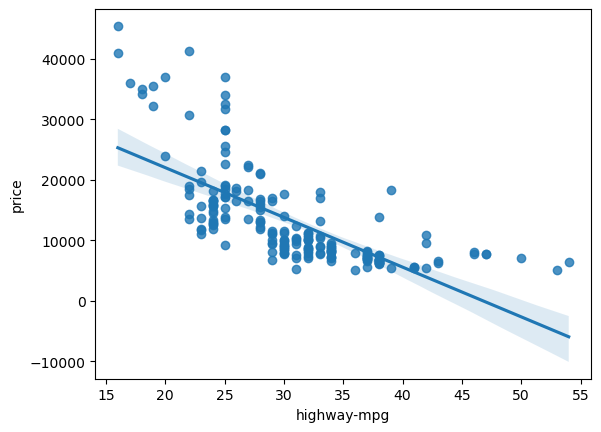

In [16]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p> A medida que aumenta el consumo (mpg) en carretera, el precio baja: esto indica una relación inversa/negativa entre estas dos variables. Las mpg en carretera podrían ser un potencial predictor del precio.</p>

In [17]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


La correlación 'highway-mpg' y 'price' es aproximadamente -0.704.


<h2>Comprobación si "peak-rpm" es una variable predictiva de "price".<h2/>

<Axes: xlabel='peak-rpm', ylabel='price'>

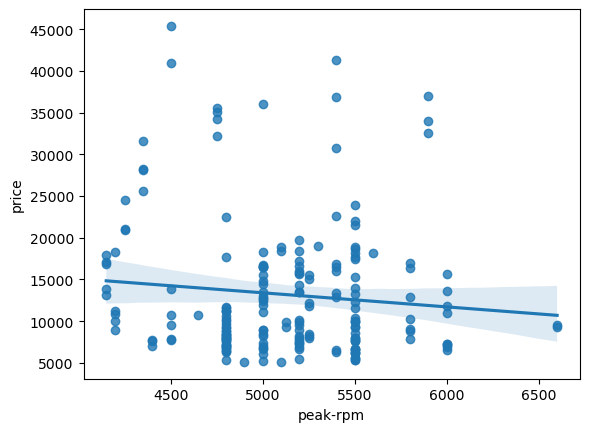

In [18]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Las "Peak rpm" no parecen ser un buen predictor del precio, ya que la línea de regresión es cercana a la horizontal. Además, los puntos de datos están muy dispersos y alejados de la línea ajustada, lo que muestra mucha variabilidad. Por tanto, no es una variable fiable.</p>

<Axes: xlabel='body-style', ylabel='price'>

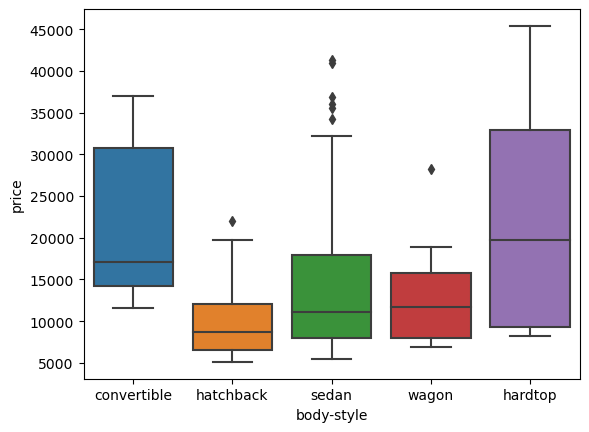

In [21]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

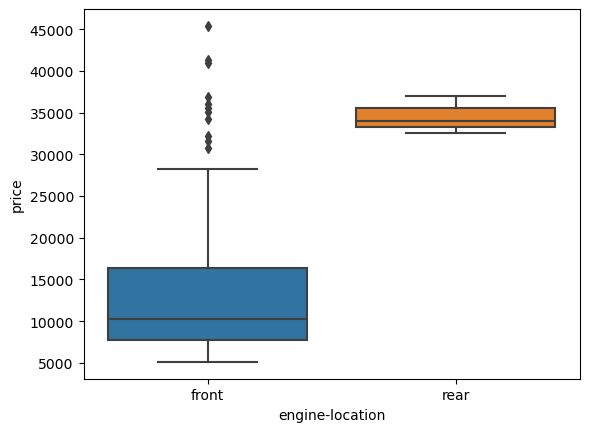

In [22]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantera y trasera, es lo suficientemente distinta como para considerar la ubicación del motor como un buen predictor potencial del precio.</p>

<Axes: xlabel='drive-wheels', ylabel='price'>

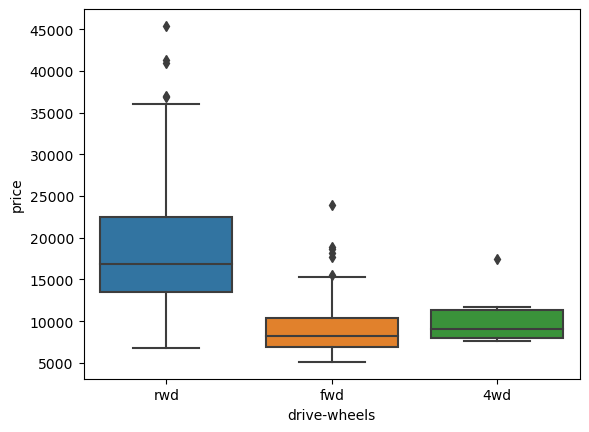

In [23]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Aquí vemos que la distribución del precio entre las diferentes categorías de ruedas motrices difiere. Como tal, las ruedas motrices podrían ser un predictor del precio.</p>

In [49]:
from scipy import stats

<h2>Wheel-base vs Price</h2>

In [50]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732552e-20


<p>La correlación entre la distancia entre ejes y el precio es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0,585).</p>

<h2>Horsepower vs Price</h2>

In [51]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of P =  6.369057428260919e-48


<p>La correlación entre los caballos de fuerza y el precio es estadísticamente significativa y la relación lineal es bastante fuerte (~0,809, cerca de 1).
</p>

<h2>Length vs Price</h2>

In [52]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483643  with a P-value of P =  8.016477466158868e-30


<p>La correlación entre longitud y precio es estadísticamente significativa y la relación lineal es moderadamente fuerte (~0,691).(~0.691).<p/>

<h2>Width vs. Price</h3>


In [53]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522665  with a P-value of P = 9.200335510484122e-38


<p>La correlación entre el ancho y el precio es estadísticamente significativa y la relación lineal es bastante fuerte (~0,751).</p>

<h2>Curb-Weight vs Price</h2>

In [54]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702847  with a P-value of P =  2.189577238893391e-53


<p> La correlación entre el peso en vacío y el precio es estadísticamente significativa y la relación lineal es bastante fuerte (~0,834).</p>

<h2>Engine-Size vs. Price</h2>


In [55]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


<p>La correlación entre el tamaño del motor y el precio es estadísticamente significativa y la relación lineal es muy fuerte (~0,872).</p>    

<h2>Highway-mpg vs Price</h2>

In [56]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474792e-31


<p>La correlación entre Highway-mpg y el price es estadísticamente significativa, y el coeficiente de aproximadamente -0,705 muestra que la relación es negativa y moderadamente fuerte.</p>

<h1>Conclusión:</h1>
<p>Ahora tenemos una mejor idea de cómo son nuestros datos y qué variables es importante tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables:</p>
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>